# Ridge regression 

- is basically minimizing a penalised version of the least-squared function. 
- The penalising shrinks the value of the regression coefficients. 
- Despite the few data points in each dimension, the slope of the prediction is much more stable and the variance in the line itself is greatly reduced, in comparison to that of the standard linear regression

In [9]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn import linear_model
np.set_printoptions(precision=4, linewidth=100)

In [11]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
np.arange(0, 10)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [5]:
np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis]

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [6]:
1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

array([[1.    , 0.5   , 0.3333, 0.25  , 0.2   , 0.1667, 0.1429, 0.125 , 0.1111, 0.1   ],
       [0.5   , 0.3333, 0.25  , 0.2   , 0.1667, 0.1429, 0.125 , 0.1111, 0.1   , 0.0909],
       [0.3333, 0.25  , 0.2   , 0.1667, 0.1429, 0.125 , 0.1111, 0.1   , 0.0909, 0.0833],
       [0.25  , 0.2   , 0.1667, 0.1429, 0.125 , 0.1111, 0.1   , 0.0909, 0.0833, 0.0769],
       [0.2   , 0.1667, 0.1429, 0.125 , 0.1111, 0.1   , 0.0909, 0.0833, 0.0769, 0.0714],
       [0.1667, 0.1429, 0.125 , 0.1111, 0.1   , 0.0909, 0.0833, 0.0769, 0.0714, 0.0667],
       [0.1429, 0.125 , 0.1111, 0.1   , 0.0909, 0.0833, 0.0769, 0.0714, 0.0667, 0.0625],
       [0.125 , 0.1111, 0.1   , 0.0909, 0.0833, 0.0769, 0.0714, 0.0667, 0.0625, 0.0588],
       [0.1111, 0.1   , 0.0909, 0.0833, 0.0769, 0.0714, 0.0667, 0.0625, 0.0588, 0.0556],
       [0.1   , 0.0909, 0.0833, 0.0769, 0.0714, 0.0667, 0.0625, 0.0588, 0.0556, 0.0526]])

In [13]:
# X is the 10x10  matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

y = np.ones(10)


In [14]:
print('X features\n', X)
print('y features\n', y)

X features
 [[1.     0.5    0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1   ]
 [0.5    0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909]
 [0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833]
 [0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769]
 [0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769 0.0714]
 [0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769 0.0714 0.0667]
 [0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769 0.0714 0.0667 0.0625]
 [0.125  0.1111 0.1    0.0909 0.0833 0.0769 0.0714 0.0667 0.0625 0.0588]
 [0.1111 0.1    0.0909 0.0833 0.0769 0.0714 0.0667 0.0625 0.0588 0.0556]
 [0.1    0.0909 0.0833 0.0769 0.0714 0.0667 0.0625 0.0588 0.0556 0.0526]]
y features
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### numpy.logspace(start, stop, num=50, endpoint=True, base=10.0)

Return numbers spaced evenly on a log scale.

In [78]:
np.logspace(2, 4, 5)

array([  100.    ,   316.2278,  1000.    ,  3162.2777, 10000.    ])

In [79]:
np.logspace(-1, -2, 2)

array([0.1 , 0.01])

In [80]:
np.logspace(-3, -1, 1)

array([0.001])

In [16]:
# Get various values of alpha

n_alphas = 200
alphas   = np.logspace(-5, 3, n_alphas)
alphas

array([1.0000e-05, 1.0970e-05, 1.2034e-05, 1.3201e-05, 1.4481e-05, 1.5886e-05, 1.7426e-05,
       1.9116e-05, 2.0970e-05, 2.3004e-05, 2.5235e-05, 2.7683e-05, 3.0368e-05, 3.3313e-05,
       3.6544e-05, 4.0088e-05, 4.3976e-05, 4.8241e-05, 5.2920e-05, 5.8052e-05, 6.3682e-05,
       6.9859e-05, 7.6634e-05, 8.4067e-05, 9.2220e-05, 1.0116e-04, 1.1098e-04, 1.2174e-04,
       1.3355e-04, 1.4650e-04, 1.6071e-04, 1.7629e-04, 1.9339e-04, 2.1215e-04, 2.3272e-04,
       2.5529e-04, 2.8005e-04, 3.0721e-04, 3.3701e-04, 3.6969e-04, 4.0555e-04, 4.4488e-04,
       4.8803e-04, 5.3536e-04, 5.8728e-04, 6.4424e-04, 7.0672e-04, 7.7526e-04, 8.5045e-04,
       9.3293e-04, 1.0234e-03, 1.1227e-03, 1.2316e-03, 1.3510e-03, 1.4820e-03, 1.6258e-03,
       1.7834e-03, 1.9564e-03, 2.1461e-03, 2.3543e-03, 2.5826e-03, 2.8331e-03, 3.1079e-03,
       3.4093e-03, 3.7399e-03, 4.1027e-03, 4.5006e-03, 4.9370e-03, 5.4159e-03, 5.9411e-03,
       6.5173e-03, 7.1494e-03, 7.8428e-03, 8.6035e-03, 9.4379e-03, 1.0353e-02, 1.1357e-02,

In [17]:
# array for storing the regression coeff
coefs = []

for a in alphas:
    
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False) # Since we did not add a col of 1s
    
    ridge.fit(X, y)
    
    coefs.append(ridge.coef_)

In [18]:
coefs[:5]

[array([  0.2324,   5.2362,  -8.6106, -10.0347,  -6.2074,  -0.8807,   4.4353,   9.1998,  13.2701,
         16.6612]),
 array([ 0.3655,  4.504 , -8.3662, -9.5023, -5.74  , -0.6121,  4.4706,  9.0091, 12.8762, 16.0914]),
 array([ 0.4951,  3.7893, -8.1257, -8.9821, -5.2845, -0.3511,  4.504 ,  8.8222, 12.4917, 15.536 ]),
 array([ 0.6206,  3.0947, -7.8899, -8.4757, -4.8422, -0.0985,  4.5354,  8.6399, 12.1178, 14.9965]),
 array([ 0.7418,  2.4225, -7.6599, -7.9847, -4.4143,  0.1451,  4.5648,  8.4625, 11.7554, 14.4743])]

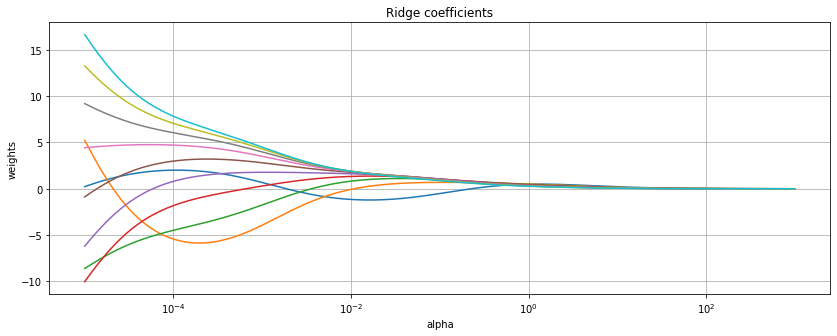

In [19]:
# Display results

plt.figure(figsize=(14, 5))
plt.grid()

ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel('alpha')
plt.ylabel('weights')

plt.title('Ridge coefficients');


When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. 

At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. 

In practise it is necessary to tune alpha in such a way that a balance is maintained between both.